# Python 201: Basic Data Analysis with Pandas

This notebook covers the two-hour workshop taught by [Nathaniel Porter](mailto:ndporter@vt.edu) and co-designed with [Chreston Miller](mailto:chmille3@vt.edu), Virginia Tech University Libraries.

Some material adapted from [Software Carpentry](https://software-carpentry.org/) and [Data Carpentry](https://datacarpentry.org/) lessons.

All content, both original and remixed, is licensed under Creative Commons Attribution 4.0 International ([CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode)) license and can be freely reused and adapted, as long as credit is provided to the original source.

See repository for date of last update.

**This workshop is designed to introduce someone with low to moderate Python 3 experience to data analysis in Pandas. If you are new to Python, we recommend completing at least Episodes 1-8 of the Software Carpentry [Programming with Python](https://swcarpentry.github.io/python-novice-inflammation/) curriculum first. We recommend downloading the free [Anaconda](https://www.anaconda.com/distribution/) package for best experience, but you can use any distribution of Python 3, as long as you also have Jupyter notebooks installed.**

All packages here are standard in Anaconda. If not using Anaconda, you may need to download additional packages.

## Getting Started in Jupyter

Start by opening the Anaconda Navigator. It provides an overview of some of the tools you can use to work with Python. For now, we'll use Jupyter notebooks, an interactive notebook that allows you to type and run code and see the results inline. Click "Launch" on the "Notebook" divider.

You should see the items in your user directory, within a Jupyter skin in your default browser. For now, click "New-Python 3" in the top right corner.

You've just made a notebook. The first thing you should do is give it a name by clicking the word "Untitled" at the top of the screen. Make sure names are descriptive and clear, such as "2022-10-26 Python and Pandas Workshop."

You'll be able to practice your Python skills in this notebook as we go, and save it for future reference.

All you should see in the body for now is a highlighted box with "In \[ \]:". That box is called a "Cell" in Jupyter notebooks and can be used for text or code.

To make a text only box, select the dropdown that says "Code" at the top of the page and change it to "Markdown." Markdown is a way to write text using a few basic codes to guide display. This cell is written in Markdown, so if I surround text in \*s, it will be *italic* or if I use two \*s, it will be **bold**. To learn more about Markdown, select "Markdown" from the Jupyter help menu.

In [ ]:
#Sometimes you want to mix text with code...
#particularly if you want to document what you're doing and why.
#If you type a # in a line of Python code...
#it will treat everything after the # as a comment and ignore when running code.

#Try it now by pressing typing a comment in the cell then pressing ALT-ENTER.
#This will run a code block and insert a new block below.

## Working with Dataframes in Pandas

Python is highly extensible through a system of add-on packages. This allows more flexibility for developers and saves system resources by not loading everything you might possibly use. Anaconda includes many of the most popular packages, including pandas (Python ANalysis of DAta), which allows for easily loading and working with data through the DataFrame structure.

A dataframe can be compared to a table, a "flat" or "rectangular" data file like a csv, or a single spreadsheet from a workbook program like Excel. More often than not, it can also be created directly from those or other file types, including data saved in popular statistics packages like R, Stata, SAS, and SPSS.

This section of the workshop introduces the idea of dataframes and demonstrates how you might familiarize yourself with your data and look for and address possible problems. 

In [1]:
#packages add functionality to Python
#import them with "import"
#it's common to use abbreviations for certain packages with the "as" option
import pandas as pd

In [2]:
#a csv file is a plain text data file
#columns are separated by commas
#each row is a single case

#you can import a csv file with the read_csv method in pandas
indata = pd.read_csv('http://bit.ly/msd_top_artists')

#when you import data, you can quickly check its contents with head
#head() displays the first few cases
indata.head()

,Unnamed: 0.1,Unnamed: 0,song_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,title,song_hotttnesss,year,duration,loudness,tempo,artist_mbtags,release,release_7digitalid
0,71,71,SOVJXVJ12A8C13517D,ARCCRTI11F4C845308,White Heart,0.477365,0.337507,Where The Thunder Roars (Tales Of Wonder Album...,0.265861,0,298.84036,-9.998,113.277,none,Tales Of Wonder,148547
1,76,76,SOWHYUG12A58A77FAB,ARODBRG1187FB3FD99,Nick Cave & The Bad Seeds,0.694022,0.479408,She Fell Away (2009 Digital Remaster),NaN,0,269.26975,-11.751,144.603,seen live,Your Funeral... My Trial (2009 Digital Remaster),413222
2,270,270,SOTVEKK12A8C1392E1,ARX9YIP1187B98A656,RUN-DMC,0.686989,0.606630,Hard Times,NaN,1984,234.65751,-12.750,119.670,hip-hop,Run DMC,293884
3,344,344,SOUPIRU12A6D4FA1E1,ARJIE2Y1187B994AB7,Line Renaud,0.470212,0.320087,Der Kleine Dompfaff,NaN,0,152.92036,-9.843,124.750,none,Platinum Line Renaud,272703
4,406,406,SOGXQRO12A8AE47D50,ARN03F71187FB4E3F4,Ayo,0.522590,0.390641,Complain,0.000000,2006,212.71465,-11.260,128.689,soul and reggae,Joyful,350343


Rows in this dataset are songs from the Million Song Data project. The data only include artists with at least 10 songs in the master database. This allows comparing artists based on song characteristics.

Look at the columns and notice the following...

String variables: 
- song_id
- artist_id 
- artist_name
- title
- artist_mbtags
- release

Numeric variables:
- artist_familiarity
- artist_hotttnesss
- song_hotttnesss
- year
- duration
- loudness
- tempo

????? variables:
- Unnamed: 0 (extra id column; unnecessary)
- Unnamed: 0.1 (extra id column; unnecessary)
- release_7digitalid

You can find more of any of the variables in the [codebook](http://bit.ly/2IsAS4F). Investigate *release_7digitalid*.

In [3]:
#release_7digitalid looks numeric but it's just an id number
#be careful to treat variables like this as strings in analysis

#you can use describe to provide summaries of each numeric varaible
#min and max help understand how variables are defined
#mean and std (standard deviation) provide basic information on the distribution
#percentiles give more detailed information on specific parts of distribution
#count is useful to check for missing data
indata.describe()
#notice ???? variables are included because Python assumed they're numbers

,Unnamed: 0.1,Unnamed: 0,artist_familiarity,artist_hotttnesss,song_hotttnesss,year,duration,loudness,tempo,release_7digitalid
count,237.000000,237.000000,237.000000,237.000000,113.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,4811.362869,4811.362869,0.622757,0.451895,0.407803,1001.455696,231.513663,-10.293586,122.211046,312785.092827
std,2804.775116,2804.775116,0.192123,0.191229,0.263034,999.374353,81.125318,4.305802,35.114772,229226.537869
min,71.000000,71.000000,0.313851,0.049034,0.000000,0.000000,29.491790,-29.521000,40.270000,450.000000
25%,2498.000000,2498.000000,0.470212,0.333303,0.261733,0.000000,185.991380,-12.370000,99.680000,121392.000000
50%,4464.000000,4464.000000,0.608704,0.390641,0.445455,1972.000000,223.215870,-9.932000,117.537000,287752.000000
75%,7414.000000,7414.000000,0.818319,0.606630,0.607037,1995.000000,273.867300,-7.037000,143.431000,420159.000000
max,9992.000000,9992.000000,0.899935,0.808502,0.945995,2009.000000,551.914650,-1.479000,241.242000,776439.000000


In [4]:
#song_hotttnesss is only valid for 113 songs

#remove missing data with dropna (but make sure to keep a copy of the unaltered data)
#the subset parameter lists variables to check for missing values
artist_data = indata.dropna(subset=['song_hotttnesss'])
artist_data.describe()

,Unnamed: 0.1,Unnamed: 0,artist_familiarity,artist_hotttnesss,song_hotttnesss,year,duration,loudness,tempo,release_7digitalid
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,4700.212389,4700.212389,0.658759,0.483748,0.407803,1147.743363,228.586463,-10.292265,121.967956,270518.141593
std,2747.411991,2747.411991,0.154490,0.144884,0.263034,990.715504,62.029246,3.747008,33.685595,243825.201138
min,71.000000,71.000000,0.323009,0.049034,0.000000,0.000000,44.198730,-21.343000,40.270000,738.000000
25%,2351.000000,2351.000000,0.522590,0.360446,0.261733,0.000000,185.991380,-12.274000,99.948000,40837.000000
50%,4134.000000,4134.000000,0.655921,0.479408,0.445455,1984.000000,217.573420,-10.319000,117.362000,225997.000000
75%,7512.000000,7512.000000,0.818319,0.604667,0.607037,1996.000000,269.348120,-7.659000,143.431000,405065.000000
max,9805.000000,9805.000000,0.899935,0.808502,0.945995,2009.000000,388.518730,-2.267000,208.567000,776437.000000


In [5]:
#now all the variables have 113 valid cases
#let's look at all the cases instead of just the first few
artist_data

,Unnamed: 0.1,Unnamed: 0,song_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,title,song_hotttnesss,year,duration,loudness,tempo,artist_mbtags,release,release_7digitalid
0,71,71,SOVJXVJ12A8C13517D,ARCCRTI11F4C845308,White Heart,0.477365,0.337507,Where The Thunder Roars (Tales Of Wonder Album...,0.265861,0,298.84036,-9.998,113.277,none,Tales Of Wonder,148547
4,406,406,SOGXQRO12A8AE47D50,ARN03F71187FB4E3F4,Ayo,0.522590,0.390641,Complain,0.000000,2006,212.71465,-11.260,128.689,soul and reggae,Joyful,350343
5,469,469,SOVIRCP12AB01891FE,AROF4LP1187FB41C51,Selena,0.748321,0.545866,Ven Conmigo/Perdoname (Live),0.000000,0,388.51873,-5.680,106.438,none,La Leyenda,756949
6,507,507,SOSMXVH12A58A7CA6C,AR6PJ8R1187FB5AD70,Shakira,0.833179,0.804220,Pienso En Ti,0.701124,1995,148.19220,-19.976,115.066,colombian,El Amor En Los Tiempos del Colera (Love In The...,439614
7,513,513,SOQSYGY12A8C137E0F,AROF4LP1187FB41C51,Selena,0.748321,0.545866,Como La Flor (2005 Re-mastering) (Live),0.000000,0,329.58649,-7.951,182.168,none,Unforgettable,205255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,9133,9133,SOUMBKO12A8C135722,AR12F2S1187FB56EEF,Aerosmith,0.872537,0.611118,Reefer Head Woman,0.566227,1979,241.86730,-12.328,94.423,heavy metal,Night In The Ruts,289322
227,9461,9461,SOCOZST12A67020452,ARE8GLF1187FB52532,Red Hot Chili Peppers,0.833968,0.576904,Parallel Universe (Album Version),0.773293,1999,269.34812,-2.976,124.915,alternative rock,Californication,9152
228,9477,9477,SOXFQVY12A58A7B456,AR9W3X91187FB3994C,Phil Collins,0.655921,0.578302,Everyday,0.614006,1993,343.43138,-9.808,94.705,british,Both Sides,40838
233,9801,9801,SOVBQWR12A8C137843,ARJIE2Y1187B994AB7,Line Renaud,0.470212,0.320087,Il N'Etait Pas Sentimental,0.000000,0,140.56444,-11.616,100.869,none,Copacabana,291956


In [6]:
#notice that some songs have year or hotttnesss of 0 or artist_mbtags of 'none'
#these are missing data that aren't labeled as such

#we want to remove these cases but dataframes use different syntax than lists
#the model we need is: df=df[df[var]!=val]
#read that expression dataframe = df WHERE variable is NOT equal to value

#let's try it for one variable
artist_data = artist_data[artist_data['artist_mbtags']!='none']
artist_data.describe()

,Unnamed: 0.1,Unnamed: 0,artist_familiarity,artist_hotttnesss,song_hotttnesss,year,duration,loudness,tempo,release_7digitalid
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,5044.647887,5044.647887,0.733710,0.550294,0.531858,1574.563380,235.562225,-10.038423,126.522380,306990.394366
std,2798.760012,2798.760012,0.116717,0.124893,0.217939,820.747059,60.547862,3.989392,32.845556,271612.405781
min,406.000000,406.000000,0.522590,0.360446,0.000000,0.000000,101.746490,-21.343000,64.101000,738.000000
25%,2816.000000,2816.000000,0.655921,0.479408,0.444373,1981.500000,188.747300,-11.976000,103.076000,31436.000000
50%,4880.000000,4880.000000,0.694022,0.578302,0.579938,1993.000000,235.650160,-9.959000,117.495000,289322.000000
75%,7755.500000,7755.500000,0.833968,0.610731,0.694399,2002.500000,273.018325,-6.981000,146.251000,484234.000000
max,9805.000000,9805.000000,0.899935,0.808502,0.945995,2009.000000,382.014240,-2.267000,208.567000,776437.000000


In [7]:
#now practice using a for loop to correct multiple variables
vars = ['year','song_hotttnesss']
for var in vars:
    artist_data = artist_data[artist_data[var]!=0]
    
artist_data.describe()

,Unnamed: 0.1,Unnamed: 0,artist_familiarity,artist_hotttnesss,song_hotttnesss,year,duration,loudness,tempo,release_7digitalid
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,4884.076923,4884.076923,0.767617,0.602199,0.614467,1995.576923,247.691603,-9.777173,119.652058,213529.538462
std,2802.668797,2802.668797,0.101267,0.091460,0.134670,8.139341,59.680690,4.150204,30.112303,210107.413809
min,507.000000,507.000000,0.522590,0.360446,0.270776,1979.000000,101.746490,-19.976000,64.101000,738.000000
25%,2472.500000,2472.500000,0.681581,0.576904,0.518310,1990.000000,204.166078,-12.287500,99.881000,15222.500000
50%,4472.500000,4472.500000,0.818319,0.605649,0.607256,1995.000000,244.244445,-9.958500,115.506000,217467.000000
75%,7578.000000,7578.000000,0.866520,0.667295,0.701712,2003.000000,283.833017,-6.630500,136.637250,394959.000000
max,9477.000000,9477.000000,0.899935,0.808502,0.945995,2009.000000,382.014240,-2.267000,206.941000,653590.000000


In [ ]:
#we now have the 52 complete cases out of 237 original cases

## Exploratory Data Visualization

Getting to know your data is an important step. So far, we've seen how to drop missing data and find basic descriptive statistics, but visualization can help you get a better sense of your data and find outliers (unusual cases) that require further examination.

In this section we'll use matplotlib to create some basic visualizations, including histograms, scatter plots and line plots. Matplotlib is very flexible and allows combining or paneling multiple plots as well as specifying custom style features. Because of this flexibility, showing a plot is a separate step from creating it.

In [8]:
#import matplotlib plus add a shortcut for the primary subset of functions
import matplotlib
import matplotlib.pyplot as plt

#plotting in Jupyter may require a little extra code to display (uncomment next line if needed)
#%matplotlib inline

<AxesSubplot:>

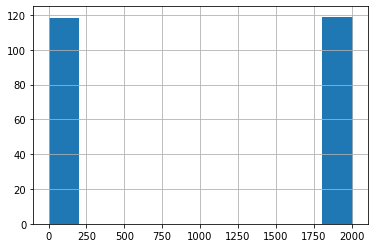

In [9]:
#histograms are great to explore single variables and check for outliers
#let's look at the distribution of songs by year released
indata['year'].hist()

<AxesSubplot:>

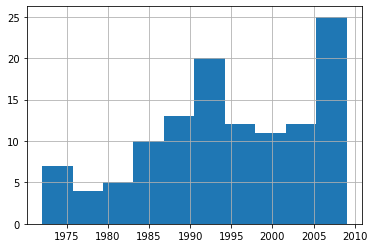

In [10]:
#That really doesn't tell us much
#Maybe we need to go back and deal with those zero values for year
plot_data = indata[indata['year']!=0]

#now replot and notice how much more we can see without missing data/outliers
plot_data['year'].hist()

In [ ]:
#we can now see that the dataset is not evenly spread across decades
#it's not clear whether this reflects all songs released or the data's coverage
#but we should be aware when planning other procedures

array([[<AxesSubplot:title={'center':'Aerosmith'}>,
        <AxesSubplot:title={'center':'Ayo'}>,
        <AxesSubplot:title={'center':'Line Renaud'}>,
        <AxesSubplot:title={'center':'Michael Jackson'}>],
       [<AxesSubplot:title={'center':'Mikey Dread'}>,
        <AxesSubplot:title={'center':'Nick Cave & The Bad Seeds'}>,
        <AxesSubplot:title={'center':'Phil Collins'}>,
        <AxesSubplot:title={'center':'RUN-DMC'}>],
       [<AxesSubplot:title={'center':'Radiohead'}>,
        <AxesSubplot:title={'center':'Red Hot Chili Peppers'}>,
        <AxesSubplot:title={'center':'Shakira'}>,
        <AxesSubplot:title={'center':'Snow Patrol'}>],
       [<AxesSubplot:title={'center':'Stevie Ray Vaughan And Double Trouble'}>,
        <AxesSubplot:title={'center':'Sugar Minott'}>,
        <AxesSubplot:title={'center':'The Del McCoury Band'}>,
        <AxesSubplot:>]], dtype=object)

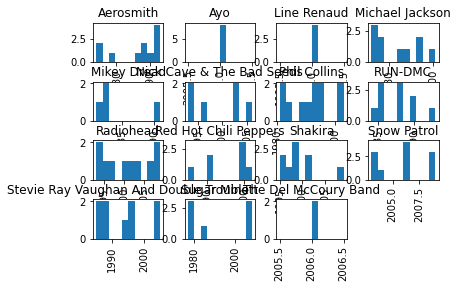

In [11]:
#you can also panel a histogram by another variable
#let's get a quick idea of how different artist's songs are spread out
plot_data['year'].hist(by=plot_data['artist_name'])

We can see that our artists vary widely. Some, like Ayo and Del McCoury Band only have songs from one year in the data. others, like Radiohead and Michael Jackson have releases from across multiple decades.

There are parameters that can be adjusted to improve the display and prevent overlap, but for now, we'll move on to scatterplots, a different way to inspect the relationship between two variables.

Histograms are best suited to numeric variables with many different values, and can be paneled by a categorical variable. Scatterplots work best for 2 numeric variables with many values.

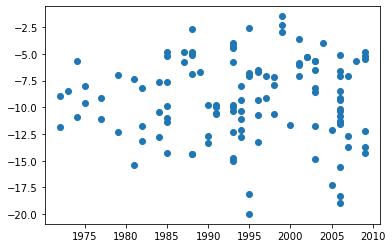

In [12]:
#Has music gotten louder over the years?
#We can use a scatterplot to check
plt.scatter(plot_data['year'],plot_data['loudness'])
plt.show()

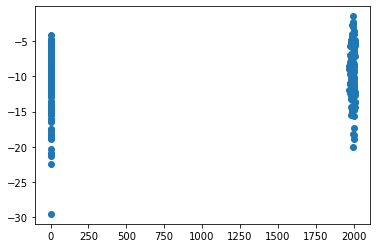

In [13]:
#the x-axis is years
#the y-axis is loudness

#at a glance, they look fairly unconnected; we can test later
#what would happen with the missing data/outliers still in?
plt.scatter(indata['year'],indata['loudness'])
plt.show()

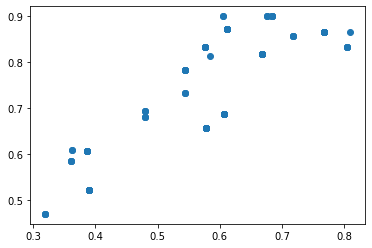

In [14]:
#two variables likely to be related are familiarity and hotttness
plt.scatter(plot_data['artist_hotttnesss'],plot_data['artist_familiarity'])
plt.show()

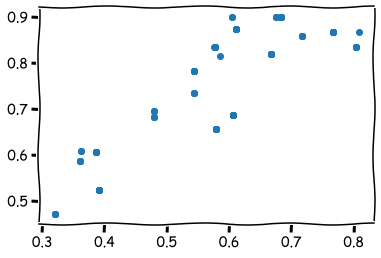

In [28]:
#check out more options like paneling and colors/shapes later
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

#one bonus example: xkcd style
with plt.xkcd():
    plt.scatter(x=plot_data['artist_hotttnesss'],y=plot_data['artist_familiarity'])

Another useful types of plot is boxplots. Boxplots summarize mean and outliers for one or more variables.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f81f3aa0580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f81f3aa0be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f81f3aa0280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f81d00f0100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f81d00f03d0>],
 'means': []}

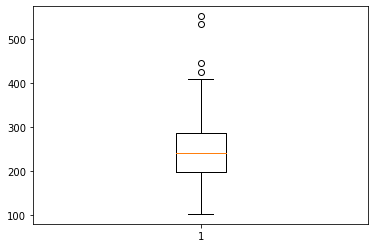

In [29]:
#plot duration
#the horizontal line in the center of the box is the median
#the top/bottom of the box are the quartiles
#any points beyond the whiskers are outliers that are unusually high or low
plt.boxplot(plot_data['duration'])

In [ ]:
#Typical song durations are between 200 and 300 seconds (3.3 to 5 minutes)
#some last close to 10 minutes

{'whiskers': [<matplotlib.lines.Line2D at 0x7f81a01d0490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f81a01d0a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f81a01d01c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f81a01d0fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f81a01dd2e0>,
 'means': []}

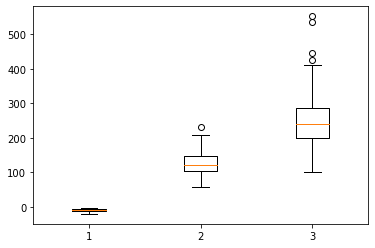

In [30]:
#plot duration, loudness and tempo on the same boxplot
data = [plot_data['loudness'],plot_data['tempo'],plot_data['duration']]
plt.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f81a016f310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f81a016f040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f81a016f4c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f81a018c4f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f81a018ce80>,
 'means': []}

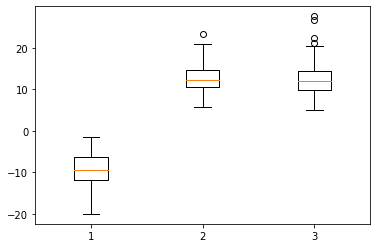

In [31]:
#scaling is an issue for plots with multiple variables
#here, the range on duration is so wide that it's hard to see loudness
#you can rescale or normalize but it makes the individual boxes less useful
data = [plot_data['loudness'],plot_data['tempo']/10,plot_data['duration']/20]
plt.boxplot(data)

## Basic statistics and analysis

The final section of the workshop demonstrates how to perform a few basic statistics (T-tests, correlation, and Chi-square tests) using dataframes. Pandas includes some statistical tools, but we will draw on a number of other packages to get the most complete results for each procedure.

The explanations for statistics here will be quite brief. If you are considering using a statistical procedure in your own research, we recommend you consult a statistics or methods text in your own discipline, a free peer-reviewed [open textbook](https://guides.lib.vt.edu/oer/opentextbooks), or [SAIG](https://saig.stat.vt.edu) (VT's statistical consulting group).

### T-tests (difference in means)

In [32]:
#lets go back to the original data and compare loudness between two artists
#loudness had no missing data, so we don't need to remove any cases

#count the number of songs by each artist
indata['artist_name'].count()

237

In [33]:
#oops - we need a way to summarize the number of songs (rows) by artist name
indata.artist_name.value_counts()

Mario Rosenstock                         13
The Jackson Southernaires                12
Phil Collins                             12
Aerosmith                                12
Sugar Minott                             12
Mikey Dread                              11
Line Renaud                              11
Radiohead                                11
Snow Patrol                              11
Nick Cave & The Bad Seeds                11
Bill & Gloria Gaither                    11
White Heart                              10
The Del McCoury Band                     10
Pumpkin Buzzard                          10
Michael Jackson                          10
Stevie Ray Vaughan And Double Trouble    10
Red Hot Chili Peppers                    10
Shakira                                  10
Selena                                   10
Ayo                                      10
RUN-DMC                                  10
Jacques Douai                            10
Name: artist_name, dtype: int64

In [34]:
#find the mean loudness of RUN-DMC (hip-hop) and Bill and Gloria Gaither (Gospel)
#remember loudness had no missing data so we can use it as-is

#first create subsets to compare
#notice that == is used for comparison
#one = always means assignment; two mean compare
gaither = indata[indata['artist_name']=='Bill & Gloria Gaither']
run = indata[indata['artist_name']=='RUN-DMC']
print('gaither mean:',gaither['loudness'].mean())
print('run-dmc mean:',run['loudness'].mean())

gaither mean: -13.38881818181818
run-dmc mean: -9.5013


In [35]:
#at least in the sample, my hypothesis appears to be correct; the mean loudness for run is higher
#let's see if we have the statistical power to draw a conclusion
#Test the difference of means using a T-test from statsmodels
import statsmodels.stats.weightstats as stats
stats.ttest_ind(gaither['loudness'],run['loudness'])

(-2.6179667186158566, 0.016923139260728713, 19.0)

To interpret the above:

- The first value is the T-Statistic, which is used to conduct the test. Larger values are associated with more probability of a meaningful difference
- The **second value, the p-value of the test**, is the key here. If p is less than a given value (usually 0.05), there is a statistically significant difference between the groups; e.g. they're not random samples drawn from the same population. Remember there is still a 1 in 20 probability that you're wrong, but if the test value p is decreased, we then increase the probability of not finding a difference even when there is a true difference.
- The third value is the degrees of freedom for the test, which is based on the number of cases. More cases provide more degrees of freedom, which allows for more statistical confidence even with the same differences in means. This is why you can't just ask the three people next to you which band is better and assume that more people in the US (or even the class) prefer whichever two of the three of them say.

So we might summarize:
> *The mean loudness of Bill and Gloria Gaither's songs is significantly lower than RUN-DMC's (p<0.017).*

### Chi-square tests (relationship between categorical variables)

But what if want to know about the relationship between categorical variables? A T-test compares values on a numeric variable between categories. A Chi-square test is more appropriate for 2 categorical variables.

Here's one situation you might use a Chi-square:
> Some musical genres seem to be more enduring than others. Rock, Adult Contemporary, Country and Gospel/Christian are a few examples of genre labels that continue to be salient over many years, even if the style itself changes throughout that time. Choose 3 common genres to test whether songs (in the subset) are released with the same relative frequency across the 1980s, 1990s and 2000s between the three genres.

In [36]:
#we'll use data here not limited to multi-song artists
indata2 = pd.read_csv('http://bit.ly/msd_genres')
indata2.head()

,Unnamed: 0,song_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,title,song_hotttnesss,year,duration,loudness,tempo,artist_mbtags,release,release_7digitalid
0,1,SOCIWDW12A8C13D406,ARMJAGH1187FB546F3,The Box Tops,0.630630,0.417500,Soul Deep,NaN,1969,148.03546,-9.843,121.274,classic pop and rock,Dimensions,300822
1,3,SONHOTT12A8C13493C,AR7G5I41187FB4CE6C,Adam Ant,0.630382,0.454231,Something Girls,NaN,1982,233.40363,-9.013,119.293,uk,Friend Or Foe,287650
2,14,SOBONFF12A6D4F84D8,ARIK43K1187B9AE54C,Lionel Richie,0.776676,0.553072,Tonight Will Be Alright,NaN,1986,307.38240,-8.346,125.197,soul and reggae,Dancing On The Ceiling,25811
3,23,SOBBUGU12A8C13E95D,ARMAC4T1187FB3FA4C,The Dillinger Escape Plan,0.839963,0.541889,Setting Fire to Sleeping Giants,0.666528,2004,207.77751,-4.264,166.862,rock and indie,Miss Machine,223365
4,30,SOGNCJP12A58A80271,ARB29H41187B98F0EF,Terry Callier,0.706828,0.416173,Do You Finally Need A Friend,0.413740,1972,342.56934,-11.939,110.189,classic pop and rock,Occasional Rain,228326


In [37]:
#find out how many total cases you have using len (for length)
len(indata2)

1988

<AxesSubplot:>

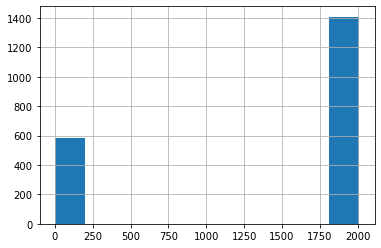

In [38]:
#use a histogram to see how many songs you have over the years
indata2['year'].hist()

<AxesSubplot:>

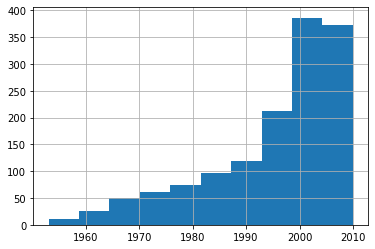

In [39]:
#time to clean up the data
g_data = indata2[indata2['year']!=0]
g_data['year'].hist()

In [40]:
#We have the most data from the 2000s
#But still quite a bit from the 80s and 90s

#create a decades variable
#function for each row to create a (string) decade variable
def makedecade(row):
    if 1980<=row['year']<1990:
        val='80s'
    elif 1990<=row['year']<2000:
        val='90s'
    elif 2000<=row['year']<2010:
        val='00s'
    else:
        val=''
    return val

#apply does the same thing to each column (axis=0) or row (axis=1) in the dataframe
#apply makedecade to each row to create a new column with decades
g_data['decade'] = g_data.apply(makedecade,axis=1)
g_data.head()

/var/folders/_0/76jf7t5n3pv1rcmnpj24y_8c0000gp/T/ipykernel_79193/951146700.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_data['decade'] = g_data.apply(makedecade,axis=1)


,Unnamed: 0,song_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,title,song_hotttnesss,year,duration,loudness,tempo,artist_mbtags,release,release_7digitalid,decade
0,1,SOCIWDW12A8C13D406,ARMJAGH1187FB546F3,The Box Tops,0.630630,0.417500,Soul Deep,NaN,1969,148.03546,-9.843,121.274,classic pop and rock,Dimensions,300822,
1,3,SONHOTT12A8C13493C,AR7G5I41187FB4CE6C,Adam Ant,0.630382,0.454231,Something Girls,NaN,1982,233.40363,-9.013,119.293,uk,Friend Or Foe,287650,80s
2,14,SOBONFF12A6D4F84D8,ARIK43K1187B9AE54C,Lionel Richie,0.776676,0.553072,Tonight Will Be Alright,NaN,1986,307.38240,-8.346,125.197,soul and reggae,Dancing On The Ceiling,25811,80s
3,23,SOBBUGU12A8C13E95D,ARMAC4T1187FB3FA4C,The Dillinger Escape Plan,0.839963,0.541889,Setting Fire to Sleeping Giants,0.666528,2004,207.77751,-4.264,166.862,rock and indie,Miss Machine,223365,00s
4,30,SOGNCJP12A58A80271,ARB29H41187B98F0EF,Terry Callier,0.706828,0.416173,Do You Finally Need A Friend,0.413740,1972,342.56934,-11.939,110.189,classic pop and rock,Occasional Rain,228326,


In [41]:
#the warning above is not an error
#it's pandas telling you to be careful changing copies
#our data still turned out how we wanted


#remove decades outside the period of interest (and data missing on year)
g_data = g_data[g_data['decade']!='']
g_data.head()

,Unnamed: 0,song_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,title,song_hotttnesss,year,duration,loudness,tempo,artist_mbtags,release,release_7digitalid,decade
1,3,SONHOTT12A8C13493C,AR7G5I41187FB4CE6C,Adam Ant,0.630382,0.454231,Something Girls,NaN,1982,233.40363,-9.013,119.293,uk,Friend Or Foe,287650,80s
2,14,SOBONFF12A6D4F84D8,ARIK43K1187B9AE54C,Lionel Richie,0.776676,0.553072,Tonight Will Be Alright,NaN,1986,307.38240,-8.346,125.197,soul and reggae,Dancing On The Ceiling,25811,80s
3,23,SOBBUGU12A8C13E95D,ARMAC4T1187FB3FA4C,The Dillinger Escape Plan,0.839963,0.541889,Setting Fire to Sleeping Giants,0.666528,2004,207.77751,-4.264,166.862,rock and indie,Miss Machine,223365,00s
7,46,SOTSEJY12AB0180F56,ART3O5Z1187B9AB043,Stevie Ray Vaughan,0.733799,0.544258,Crossfire,NaN,1992,248.78975,-7.805,116.721,jazz and blues,Greatest Hits,417945,90s
8,47,SOTSETT12AB01863B8,AR5U94U1187FB5CDCF,John Hammond,0.590693,0.452818,I Can't Be Satisfied,NaN,2002,195.31710,-10.700,123.142,folk,Bluesman,575531,00s


In [42]:
#View a list of genres to choose from
g_data.artist_mbtags.value_counts()

rock and indie                124
classic pop and rock          123
hip hop rnb and dance hall    121
uk                            106
american                       93
british                        82
pop and chart                  64
folk                           57
rock                           54
german                         52
finnish                        50
country                        45
punk                           44
soul and reggae                43
alternative rock               42
french                         39
jazz and blues                 36
production music               22
Name: artist_mbtags, dtype: int64

Investigate the following hypothesis using Chi-square:
> The number of songs released in the genres "folk", "rock" and "soul and reggae" were distributed differently across the decades of the 80s, 90s and 2000s. Of the three, soul and reggae is likely to be more closely tied to individual time periods and less consistent across the decades.

In [43]:
#Restrict to key genres

#list genres
genres = ['folk','rock','soul and reggae']

#loop over rows with list and mark if genre matches
def genreIndicator(row):
    temp = 0
    for genre in genres:
        if row['artist_mbtags']==genre:
            temp += 1
    return temp

#create new variable using function
g_data['keep']=g_data.apply(genreIndicator,axis=1)

#remove other genres and inspect data
g_data = g_data[g_data['keep'] != 0]
g_data.head()

,Unnamed: 0,song_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,title,song_hotttnesss,year,duration,loudness,tempo,artist_mbtags,release,release_7digitalid,decade,keep
2,14,SOBONFF12A6D4F84D8,ARIK43K1187B9AE54C,Lionel Richie,0.776676,0.553072,Tonight Will Be Alright,NaN,1986,307.38240,-8.346,125.197,soul and reggae,Dancing On The Ceiling,25811,80s,1
8,47,SOTSETT12AB01863B8,AR5U94U1187FB5CDCF,John Hammond,0.590693,0.452818,I Can't Be Satisfied,NaN,2002,195.31710,-10.700,123.142,folk,Bluesman,575531,00s,1
11,55,SODHVES12A6701CE6B,AR3793X1187FB50CB3,Chris Rea,0.643183,0.500691,Driving Home For Christmas,0.767728,1986,241.16200,-8.531,180.149,rock,The Road To Hell Part 2,17220,80s,1
21,94,SORWHWY12A6702038E,ARXWAQQ1187B9AE954,Redman,0.743130,0.493567,WKYA (drop),0.570106,2001,124.18567,-10.296,85.008,soul and reggae,Malpractice,8552,00s,1
29,115,SOFRAZJ12A8C143CDB,ARR9XGB1187B9912E6,Boyz II Men,0.790923,0.601185,On Bended Knee,0.345802,1994,329.27302,-7.103,116.473,soul and reggae,Legacy,523481,90s,1


In [44]:
#a crosstab table shows how many rows have each combination of values for 2 variables

#run a crosstab table of genre and decade
tab = pd.crosstab(g_data['decade'],g_data['artist_mbtags'])
tab
#it looks like soul and reggae may be different (relatively more common in 2000s than before)

artist_mbtags,folk,rock,soul and reggae
decade,,,
00s,31,33,32
80s,7,6,3
90s,19,15,8


In [45]:
#Chi-square helps to determine if there is a relationship...
#by comparing cell counts to those expected randomly 

#test hypothesis
#notice you can import a single procedure from a package
from scipy.stats.contingency import chi2_contingency
chi2_contingency(tab)

(4.26062066503468,
 0.37188218379120147,
 4,
 array([[35.53246753, 33.66233766, 26.80519481],
        [ 5.92207792,  5.61038961,  4.46753247],
        [15.54545455, 14.72727273, 11.72727273]]))

To interpret the above:

- The first value is the Chi-squared statistic, which is used to conduct the test. Larger values are associated with more probability of a meaningful difference
- The **second value, the p-value of the test**, is the key here. If p is less than a given value (usually 0.05), there is a statistically significant relationship between the variables; e.g. one is not randomly distributed across the other. Remember there is still a 1 in 20 probability that you're wrong, but if the test value p is decreased, we then increase the probability of not finding a relationship even when there is a true relationship.
- The third value is the degrees of freedom for the test.
- The fourth result is the array of expected values. This assumes each variable is randomly distributed across the other

So we might summarize, using a p<0.05 criterion:
> *With p<0.37, we do not find evidence of a statistical difference in the distribution of number of folk, rock and soul & reggae music across the 80s, 90s and 2000s.*

The non-finding does not mean we assume there is no relationship. If we had a larger sample, it's quite likely we would find a relationship. Additionally, our data may not be of equal quality or completeness for each decade.

### Correlation (relationship between interval variables)

When you have two interval-level (fully numeric) variables to compare, you can use correlation to test whether if one is higher, the other tends to be higher (positive), lower (negative) or unrelated (zero/non-significant).

Here is the task for this section:
> There has been some speculation that the hotttnesss and familiarity measurement in the Million Song data might be biased toward music that was newer when the data were collected (2010). Investigate the relationship between year (not recoded) and the three variables to test whether there is reason to further investigate the potential for such bias.

In [46]:
#read in full subset of Million song data
indata3 = pd.read_csv('http://bit.ly/msd_subset_all')

#check it out
len(indata3)

10000

In [47]:
indata3.head()

,Unnamed: 0,song_id,artist_id,artist_name,artist_familiarity,artist_hotttnesss,title,song_hotttnesss,year,duration,loudness,tempo,artist_mbtags,release,release_7digitalid
0,0,SOMZWCG12A8C13C480,ARD7TVE1187B99BFB1,Casual,0.581794,0.401998,I Didn't Mean To,0.602120,0,218.93179,-11.197,92.198,none,Fear Itself,300848
1,1,SOCIWDW12A8C13D406,ARMJAGH1187FB546F3,The Box Tops,0.630630,0.417500,Soul Deep,NaN,1969,148.03546,-9.843,121.274,classic pop and rock,Dimensions,300822
2,2,SOXVLOJ12AB0189215,ARKRRTF1187B9984DA,Sonora Santanera,0.487357,0.343428,Amor De Cabaret,NaN,0,177.47546,-9.689,100.070,none,Las Numero 1 De La Sonora Santanera,514953
3,3,SONHOTT12A8C13493C,AR7G5I41187FB4CE6C,Adam Ant,0.630382,0.454231,Something Girls,NaN,1982,233.40363,-9.013,119.293,uk,Friend Or Foe,287650
4,4,SOFSOCN12A8C143F5D,ARXR32B1187FB57099,Gob,0.651046,0.401724,Face the Ashes,0.604501,2007,209.60608,-4.501,129.738,none,Muertos Vivos,611336


In [48]:
#remove missing data on all variables
vars = ['year','song_hotttnesss','artist_hotttnesss','artist_familiarity']
indata3 = indata3.dropna(subset=vars) #defined NaN
for var in vars:
    indata3 = indata3[indata3[var]!=0] #missing set to zero
indata3 = indata3[vars] #drop exra variables
indata3.head()

,year,song_hotttnesss,artist_hotttnesss,artist_familiarity
4,2007,0.604501,0.401724,0.651046
8,1984,0.265861,0.332276,0.426668
15,1987,0.405116,0.447935,0.636424
18,2004,0.684136,0.513463,0.707200
23,2004,0.666528,0.541889,0.839963


In [49]:
#Use pandas to get correlation matrix for all variables
#correlations are pairwise (between 2 variables)
#they range from -1 to 1, with zero being random/unrelated
corrMatr = indata3.corr()
corrMatr

,year,song_hotttnesss,artist_hotttnesss,artist_familiarity
year,1.000000,0.065018,0.071455,0.102442
song_hotttnesss,0.065018,1.000000,0.459118,0.499423
artist_hotttnesss,0.071455,0.459118,1.000000,0.782037
artist_familiarity,0.102442,0.499423,0.782037,1.000000


In [50]:
#each variable is perfectly correlated with itself
#other correlations range from 0.07(minimal) to 0.78 (very high)

#we're interested only in the first column (correlation with year)

#use scipy to get p-value for hypothesis testing
import scipy.stats
scipy.stats.pearsonr(indata3['year'], indata3['song_hotttnesss'])

(0.06501756123228788, 0.0007270482408063637)

The results can be interpreted:
- the first number returned is the correlation (the same as in corr() above)
- the second number is the statistical significance (p-value)
- remember that the e-NUM notation is scientific and means move the decimal to the left NUM positions

We find here:
> There is a small but significant (p<.0007) positive correlation between year and song hotttnesss. Songs released in later years tend to be rated somewhat more hot than earlier songs.

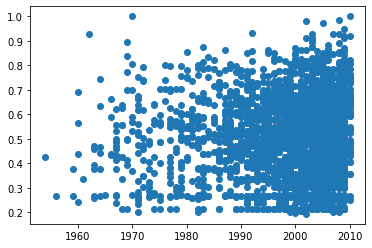

In [51]:
#we can also view this on a scatter-plot
plt.scatter(indata3['year'], indata3['song_hotttnesss'])
plt.show()

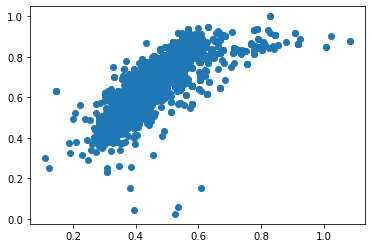

In [52]:
#the correlation is small enough, it's hard to tell visually
#for comparison, here is a strong correlation
plt.scatter(indata3['artist_hotttnesss'], indata3['artist_familiarity'])
plt.show()

Thanks for participating in this workshop. We hope it's been helpful! Feel free to save, share and adapt the notebook from [this repository](https://github.com/ndporter/pandasS19).

If you would like further assistance with pandas or other data questions, please contact [dataservices@vt.edu](mailto:dataservices@vt.edu).